In [1]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub

detector = hub.load("https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1")

In [2]:
labels = np.genfromtxt('coco-labels.txt', delimiter=',',dtype='str')

In [3]:
# images = []
# for fname in os.listdir('input'):
#     image = cv2.imread(f'input/{fname}')
#     #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     images.append(image)
# images = np.array(images)
# detector_output = detector(images)

image = cv2.imread(f"kot-frusia.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_tensor = np.expand_dims(image,axis=0)
detector_output = detector(image_tensor)

In [5]:
detector_output["detection_classes"]

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[17., 62., 31., 65., 62., 62., 15., 84., 31.,  1., 65., 89., 62.,
        31., 17., 15., 62., 27., 33., 15., 85., 17., 28., 67., 67., 16.,
        72., 17., 15., 31.,  1., 81., 33., 76., 44.,  1., 39., 63., 82.,
        31., 62., 85., 49.,  1., 27., 62., 89., 15.,  1., 88.,  1., 81.,
        63., 27., 86., 31., 31., 62., 15., 27., 16., 64., 50., 84., 47.,
        64., 31., 63., 75., 65., 84.,  1., 62., 31., 84., 84., 85., 47.,
        84.,  1.,  1., 36., 72., 84., 33., 75., 47., 40., 75., 62., 72.,
        85.,  2., 28.,  1., 72., 87.,  1., 77., 28.]], dtype=float32)>

In [5]:
detector_output["detection_scores"]

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.9895783 , 0.73141265, 0.31591186, 0.29540503, 0.28482738,
        0.25623283, 0.21335949, 0.19379535, 0.16792397, 0.1558494 ,
        0.13534059, 0.1319326 , 0.12969923, 0.10073332, 0.09856369,
        0.08475438, 0.08053153, 0.07745784, 0.07495022, 0.06629781,
        0.06309758, 0.06185431, 0.05825588, 0.05474623, 0.05447461,
        0.05261962, 0.05155369, 0.05085052, 0.05052496, 0.05041247,
        0.04557431, 0.04198464, 0.04074682, 0.03858586, 0.03836225,
        0.03812827, 0.03489687, 0.03446322, 0.03377083, 0.03166268,
        0.02994821, 0.02810701, 0.02710476, 0.02701452, 0.02601445,
        0.02585731, 0.02539218, 0.02465357, 0.02445235, 0.0242028 ,
        0.02406621, 0.02386532, 0.02346803, 0.02343113, 0.02317902,
        0.02227106, 0.02202237, 0.02157503, 0.02150875, 0.02104404,
        0.02097647, 0.01960883, 0.01790498, 0.01564776, 0.01504825,
        0.01491978, 0.01402921, 0.0134054 , 0.0133487 , 0.01332642

In [6]:
detector_output["detection_boxes"][0,:10]

<tf.Tensor: shape=(10, 4), dtype=float32, numpy=
array([[2.26703763e-01, 2.12436303e-01, 6.21734560e-01, 6.66415811e-01],
       [2.38045976e-01, 5.57626784e-01, 3.44255656e-01, 6.42077208e-01],
       [2.67021716e-01, 7.54791424e-02, 3.51176411e-01, 1.37963146e-01],
       [3.60651404e-01, 1.47968531e-01, 7.50303090e-01, 7.78233886e-01],
       [2.38545462e-01, 1.95449516e-01, 6.30098283e-01, 6.73795044e-01],
       [3.60651404e-01, 1.47968531e-01, 7.50303090e-01, 7.78233886e-01],
       [3.93900871e-01, 1.22174166e-01, 7.76241422e-01, 8.05858433e-01],
       [6.97728336e-01, 2.43685871e-01, 8.10195744e-01, 7.08310544e-01],
       [3.43197614e-01, 8.67011473e-02, 3.95512611e-01, 1.33931920e-01],
       [0.00000000e+00, 6.45416963e-04, 4.82335389e-01, 1.05844758e-01]],
      dtype=float32)>

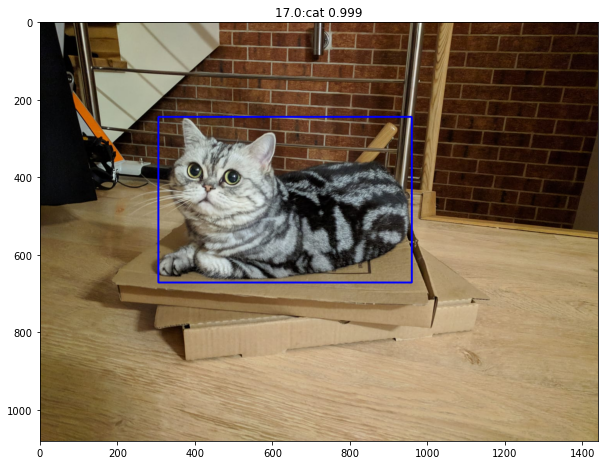

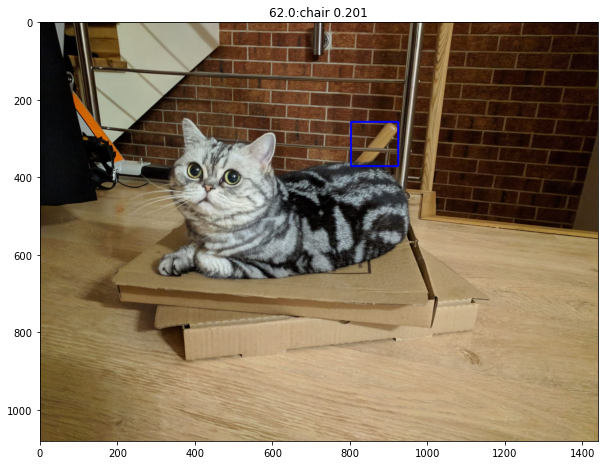

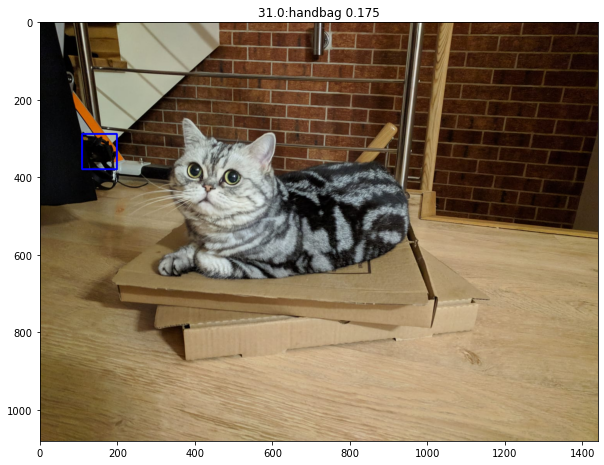

In [7]:
h = image.shape[0]
w = image.shape[1]

output = image.copy()
for i,box in enumerate(detector_output['detection_boxes'][0]):
    box = box.numpy()
    #print("b",box)
    box[0] = box[0]*h
    box[1] = box[1]*w
    box[2] = box[2]*h
    box[3] = box[3]*w
    box = np.array(box,dtype='int')
    c = detector_output["detection_classes"][0,i]
    v = detector_output["detection_scores"][0,i]
    if v>0.1:
        output = image.copy()
        cv2.rectangle(output, (box[1], box[0]), (box[3], box[2]), (0,0,255), 3)
        cc = int(c.numpy())
        plt.figure(figsize=(10,10))
        plt.title(f'{c}:{labels[cc]} {v:.3f}')
        plt.imshow(output)
        plt.show()
    